<a href="https://colab.research.google.com/github/MarcoMartini75/dati/blob/master/prima_prova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! git clone --recursive https://github.com/MarcoMartini75/dati
      

Cloning into 'dati'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [0]:
df = pd.read_csv("/content/dati/Womens Clothing E-Commerce Reviews.csv", index_col = 0)

In [0]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [0]:
pd.isnull(df).sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [0]:
df = df.dropna(subset=['Title', 'Review Text'])

# **Y = Recommended IND **

In [0]:
from sklearn.model_selection import train_test_split

X = df['Title']

y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [0]:
from time import time
t0 = time()
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.302 secondes


## Logistic Regression

In [0]:
t0 = time()
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Réalisé en 0.998 secondes


In [0]:
from sklearn.metrics import classification_report

print( classification_report(y_test, y_pred) )

cm_lr = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_lr)

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       706
           1       0.91      0.95      0.93      3229

   micro avg       0.88      0.88      0.88      3935
   macro avg       0.81      0.76      0.78      3935
weighted avg       0.87      0.88      0.88      3935

Classe prédite    0     1
Classe réelle            
0               398   308
1               156  3073


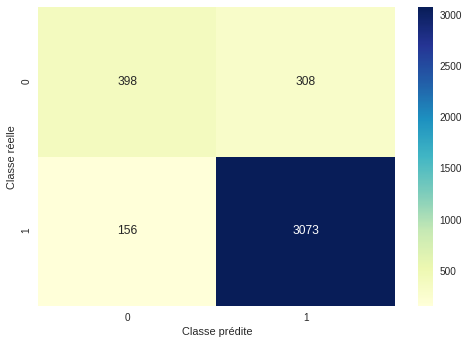

In [0]:
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="YlGnBu")

## Gradient Boosting

In [0]:
t0 = time()

from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 202.294 secondes


In [0]:
print( classification_report(y_test, y_pred) )
cm_gb = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_gb)

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       706
           1       0.89      0.94      0.92      3229

   micro avg       0.86      0.86      0.86      3935
   macro avg       0.78      0.72      0.74      3935
weighted avg       0.85      0.86      0.85      3935

Classe prédite    0     1
Classe réelle            
0               346   360
1               181  3048


## SVM

In [0]:
t0 = time()

from sklearn import svm
clf_svm_rec = svm.SVC(C = 0.1, gamma = 0.001,  kernel='linear')
clf_svm_rec.fit(X_train, y_train)
y_pred = clf_svm_rec.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 872.503 secondes


In [0]:
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,361,345
1,136,3093


## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

t0 = time()

dtc_rec = DecisionTreeClassifier(max_depth = 3)
dtc_rec.fit(X_train, y_train)
y_pred = dtc_rec.predict(X_test)



t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 4.984 secondes


In [0]:
print( classification_report(y_test, y_pred) )
cm_dtc_rec = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_dtc_rec)

              precision    recall  f1-score   support

           0       0.68      0.24      0.35       706
           1       0.85      0.98      0.91      3229

   micro avg       0.84      0.84      0.84      3935
   macro avg       0.76      0.61      0.63      3935
weighted avg       0.82      0.84      0.81      3935

Classe prédite    0     1
Classe réelle            
0               167   539
1                80  3149


In [0]:
from sklearn.ensemble import BaggingClassifier

t0 = time()

dtc_rec_u = DecisionTreeClassifier(max_depth = 3)
bc = BaggingClassifier(base_estimator = dtc_rec_u, n_estimators = 100, max_samples = 0.5, max_features=0.7)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 203.067 secondes


In [0]:
print( classification_report(y_test, y_pred) )
cm_bc_rec = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_bc_rec)

              precision    recall  f1-score   support

           0       0.72      0.20      0.31       706
           1       0.85      0.98      0.91      3229

   micro avg       0.84      0.84      0.84      3935
   macro avg       0.78      0.59      0.61      3935
weighted avg       0.82      0.84      0.80      3935

Classe prédite    0     1
Classe réelle            
0               141   565
1                56  3173


## AdA

In [0]:
from sklearn.ensemble import AdaBoostClassifier

t0 = time()

ac = AdaBoostClassifier(base_estimator = dtc_rec_u, learning_rate = 0.1, n_estimators = 100)
ac.fit(X_train, y_train)
y_pred = ac.predict(X_test)


t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))



Réalisé en 514.258 secondes


In [0]:
print( classification_report(y_test, y_pred) )
cm_ac_rec = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_ac_rec)

              precision    recall  f1-score   support

           0       0.79      0.35      0.49       706
           1       0.87      0.98      0.92      3229

   micro avg       0.87      0.87      0.87      3935
   macro avg       0.83      0.67      0.71      3935
weighted avg       0.86      0.87      0.85      3935

Classe prédite    0     1
Classe réelle            
0               249   457
1                67  3162


# **Y = Rating**

In [0]:
X = df['Title']

y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

## Logistic Regression

In [0]:
t0 = time()
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(C = 1.0)
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Réalisé en 1.061 secondes


In [0]:
print( classification_report(y_test, y_pred) )

cm_lr_rat = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_lr_rat)

              precision    recall  f1-score   support

           1       0.35      0.18      0.24       131
           2       0.35      0.20      0.26       275
           3       0.42      0.35      0.38       486
           4       0.42      0.23      0.30       866
           5       0.72      0.94      0.81      2177

   micro avg       0.63      0.63      0.63      3935
   macro avg       0.45      0.38      0.40      3935
weighted avg       0.58      0.63      0.59      3935

Classe prédite   1   2    3    4     5
Classe réelle                         
1               24  22   36   12    37
2               26  55   97   37    60
3               15  59  168  124   120
4                2  12   74  203   575
5                2   7   26  102  2040


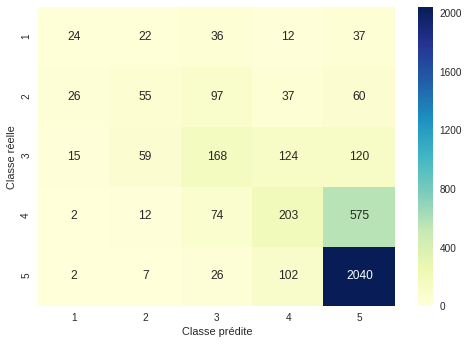

In [0]:
sns.heatmap(cm_lr_rat, annot=True, fmt="d", cmap="YlGnBu")

## SVM

In [0]:
t0 = time()

from sklearn import svm
clf_svm_rat = svm.SVC(C = 0.1, gamma = 0.001,  kernel='linear')
clf_svm_rat.fit(X_train, y_train)
y_pred = clf_svm_rat.predict(X_test)

t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 1862.639 secondes


In [0]:
print( classification_report(y_test, y_pred) )
cm_svm_rat = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(cm_svm_rat)

              precision    recall  f1-score   support

           1       0.67      0.05      0.09       131
           2       0.48      0.04      0.08       275
           3       0.39      0.40      0.39       486
           4       0.42      0.15      0.22       866
           5       0.68      0.96      0.80      2177

   micro avg       0.62      0.62      0.62      3935
   macro avg       0.53      0.32      0.32      3935
weighted avg       0.57      0.62      0.55      3935

Classe prédite  1   2    3    4     5
Classe réelle                        
1               6   1   56   11    57
2               2  12  136   30    95
3               1  11  192   90   192
4               0   1   84  131   650
5               0   0   28   50  2099


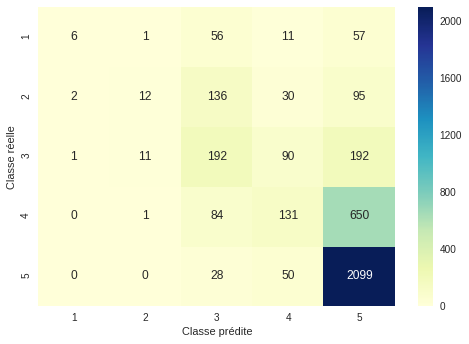

In [0]:
sns.heatmap(cm_svm_rat, annot=True, fmt="d", cmap="YlGnBu")

In [0]:
2099/(2099+50+28)

0.9641708773541571

In [0]:
2099/(2099+650+192+95+57)

0.678629162625283

In [0]:
2*0.9641708773541571*0.678629162625283/(0.9641708773541571+0.678629162625283)

0.7965844402277039